In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraccion y carga de datos

In [2]:
# Método para lectura de los archivos
def read_file(filename):
    x = pickle._Unpickler(open(filename,'rb'))
    x.encoding='latin1'
    p = x.load()
    return p

In [3]:
# Se elige los archivos a cargar
files = []
for n in range(5,9):
    s = ''
    if n < 10:
        s+='0'
    s+=str(n)
    files.append(s)
print(files)    

['05', '06', '07', '08']


In [4]:
# Se realiza la lectura de los archivos y se agregan en los arreglos data y labels respectivamente
labels = []
data = []
for i in files:
    filename = "Archivos/s" + i + ".dat"
    trial = read_file(filename)
    labels.append(trial['labels'])
    data.append(trial['data'])

# Reajustamos a un arreglo numpy los datos cargados de label
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4) #video/trial x label (valence, arousal, dominance, liking)

# Reajustamos a un arreglo numpy los datos cargados de data
data = np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)# video/trial x channel x data


In [5]:
# Se imprime las propiedades o dimensiones de cada uno de los arreglos
print('Labels: ', labels.shape)
print('Data', data.shape)

Labels:  (160, 4)
Data (160, 40, 8064)


# One hot encoder para labels

In [6]:
# Funcion que asigna un valor binario a la caracteristica 'valence' 0 < media >= 1
def valence(trial):
    return 1 if labels[trial,0] >= np.mean(labels[:,0]) else 0

# Funcion que asigna un valor binario a la caracteristica 'arousal' 0 < media >= 1
def arousal(trial):
    return 1 if labels[trial,1] >= np.mean(labels[:,1]) else 0

In [7]:
# Recuperamos las caracteristicas de 'valence' y 'arousal' y las agregams a un dataframe
labels_encoded = []
for i in range (len(labels)):
    labels_encoded.append([valence(i),arousal(i)])


labels_encoded = np.reshape(labels_encoded, (160,2))
df_labels = pd.DataFrame(data =labels_encoded,columns=['Valence','Arousal'])
print(df_labels.describe())

          Valence     Arousal
count  160.000000  160.000000
mean     0.537500    0.450000
std      0.500157    0.499056
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [8]:
# visualizando las caracteristicas
df_labels

Valence  Arousal
0          1        0
1          1        1
2          0        0
3          1        0
4          0        0
..       ...      ...
155        0        1
156        0        0
157        0        0
158        0        0
159        0        0

[160 rows x 2 columns]

# Reajuste a 32 canales 

In [9]:
# Se crea un arreglo para ajustar a los 32 canales
eeg_channels = list(range(1,33))
print(eeg_channels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [10]:
# Se realiza el reajuste de canales
egg_data = []
for i in range (len(data)):
    for j in range (len(eeg_channels)):
        egg_data.append(data[i,j])
egg_data = np.reshape(egg_data, (len(data),len(eeg_channels),len(data[0,0])))
print(egg_data.shape)

(160, 32, 8064)


# Realizando extraccion de caracteristicas

In [11]:
# Se obtiene las respectivas medidas estadisticas 
mean_data = np.mean(egg_data, axis=2)
var_data = np.var(egg_data, axis=2) 
median_data = np.median(egg_data, axis=2)

# Concatenamos las medidas estadisticas para crear una matriz de carctersitcas dependientes
feature_data = np.concatenate((mean_data, var_data, median_data), axis=1)
feature_data = pd.DataFrame(feature_data)
feature_data

0         1         2         3         4         5         6   \
0   -0.124613 -0.213920 -0.108840  0.238012 -0.044924 -0.018392 -0.133522   
1   -0.038647 -0.103394 -0.016777  0.098475 -0.048333 -0.016133 -0.067308   
2   -0.101349  0.017155 -0.086764  0.190292  0.134925  0.204365  0.114452   
3    0.204372 -0.127836  0.193915 -0.154159 -0.213724 -0.344462 -0.241752   
4    0.670014  0.697445  0.467880 -1.242901 -0.091543 -0.333689  0.327771   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.034560 -0.125993 -0.011701  0.089914 -0.020768 -0.104013  0.054367   
156  0.001392 -0.079255 -0.234174 -0.622337  0.112699 -0.147966 -0.360885   
157 -0.009958  0.123989  0.114569  0.331677  0.029168  0.086859  0.146303   
158 -0.153765 -0.439413 -0.360844 -0.596541  0.183947 -0.365720 -0.335553   
159 -0.106044  0.015583 -0.016603 -0.156841 -0.049135 -0.017322 -0.150003   

           7         8         9   ...        86        87        88  \
0    0.491180  0.140811 -0.440095  ... -0.033168 -0.891401 -0.076324   
1    0.216928  0.094275 -0.213614  ... -0.059511 -0.939760 -0.042556   
2    0.283354 -0.037267 -0.045507  ... -0.123067  0.275576  0.067654   
3   -0.126305  0.261137 -0.225269  ...  0.061754 -0.855222 -0.086867   
4   -2.299656 -0.379023  1.731752  ...  0.134903  2.812627  0.469224   
..        ...       ...       ...  ...       ...       ...       ...   
155 -0.090257 -0.093217  0.044990  ...  0.037330  0.004209 -0.142122   
156 -0.620235  0.183689 -0.366755  ... -0.034174  0.130220 -0.009028   
157  0.235718 -0.089044  0.132446  ...  0.030623 -0.142049 -0.091385   
158 -0.974069  0.083692 -0.283637  ...  0.199438  0.538902 -0.319997   
159 -0.016165  0.113891 -0.150564  ... -0.119858 -0.215546  0.249855   

           89        90        91        92        93        94        95  
0    0.213730  0.083256 -0.429163  0.106847 -0.125578 -0.047205  0.297791  
1    0.352929  0.226317 -0.324682  0.185749  0.028388  0.016532  0.408709  
2   -0.075377 -0.091235  0.116436 -0.129738 -0.177661 -0.221460 -0.281146  
3    0.431572 -0.149623  0.046950  0.389890  0.121562  0.175134 -0.033605  
4   -0.598827 -1.023712  2.170608 -0.336869  0.145911  0.290126 -1.614567  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.206289 -0.038145  0.013670 -0.015553 -0.296836  0.121054  0.233882  
156  0.072097  0.260309 -0.152198  0.350030  0.547847  0.328656  0.188243  
157  0.090471 -0.134790 -0.033024 -0.105118 -0.345880 -0.083218 -0.083567  
158  0.158450 -0.042942 -0.125502  0.480972  0.205598  0.680985  0.500240  
159  0.080958  0.344060  0.010925  0.196870  0.457584  0.076979 -0.091597  

[160 rows x 96 columns]

# Unificando la data

In [12]:
def graficaCorrelacion(data):
#     corr = data.corr() # se selecciona todas las caracteristicas para el entrenamiento
    corr = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
    return corr
    # Grafica en mapa de calor la correlación
#     sns.heatmap(corr, 
#             xticklabels=corr.columns,
#             yticklabels=corr.columns)

In [13]:
# Se concatena las caracteristicas dependientes y las independientes en un solo dataframe
unified_data = pd.concat([feature_data, df_labels],axis=1)
unified_data

0         1         2         3         4         5         6  \
0   -0.124613 -0.213920 -0.108840  0.238012 -0.044924 -0.018392 -0.133522   
1   -0.038647 -0.103394 -0.016777  0.098475 -0.048333 -0.016133 -0.067308   
2   -0.101349  0.017155 -0.086764  0.190292  0.134925  0.204365  0.114452   
3    0.204372 -0.127836  0.193915 -0.154159 -0.213724 -0.344462 -0.241752   
4    0.670014  0.697445  0.467880 -1.242901 -0.091543 -0.333689  0.327771   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.034560 -0.125993 -0.011701  0.089914 -0.020768 -0.104013  0.054367   
156  0.001392 -0.079255 -0.234174 -0.622337  0.112699 -0.147966 -0.360885   
157 -0.009958  0.123989  0.114569  0.331677  0.029168  0.086859  0.146303   
158 -0.153765 -0.439413 -0.360844 -0.596541  0.183947 -0.365720 -0.335553   
159 -0.106044  0.015583 -0.016603 -0.156841 -0.049135 -0.017322 -0.150003   

            7         8         9  ...        88        89        90  \
0    0.491180  0.140811 -0.440095  ... -0.076324  0.213730  0.083256   
1    0.216928  0.094275 -0.213614  ... -0.042556  0.352929  0.226317   
2    0.283354 -0.037267 -0.045507  ...  0.067654 -0.075377 -0.091235   
3   -0.126305  0.261137 -0.225269  ... -0.086867  0.431572 -0.149623   
4   -2.299656 -0.379023  1.731752  ...  0.469224 -0.598827 -1.023712   
..        ...       ...       ...  ...       ...       ...       ...   
155 -0.090257 -0.093217  0.044990  ... -0.142122  0.206289 -0.038145   
156 -0.620235  0.183689 -0.366755  ... -0.009028  0.072097  0.260309   
157  0.235718 -0.089044  0.132446  ... -0.091385  0.090471 -0.134790   
158 -0.974069  0.083692 -0.283637  ... -0.319997  0.158450 -0.042942   
159 -0.016165  0.113891 -0.150564  ...  0.249855  0.080958  0.344060   

           91        92        93        94        95  Valence  Arousal  
0   -0.429163  0.106847 -0.125578 -0.047205  0.297791        1        0  
1   -0.324682  0.185749  0.028388  0.016532  0.408709        1        1  
2    0.116436 -0.129738 -0.177661 -0.221460 -0.281146        0        0  
3    0.046950  0.389890  0.121562  0.175134 -0.033605        1        0  
4    2.170608 -0.336869  0.145911  0.290126 -1.614567        0        0  
..        ...       ...       ...       ...       ...      ...      ...  
155  0.013670 -0.015553 -0.296836  0.121054  0.233882        0        1  
156 -0.152198  0.350030  0.547847  0.328656  0.188243        0        0  
157 -0.033024 -0.105118 -0.345880 -0.083218 -0.083567        0        0  
158 -0.125502  0.480972  0.205598  0.680985  0.500240        0        0  
159  0.010925  0.196870  0.457584  0.076979 -0.091597        0        0  

[160 rows x 98 columns]

In [14]:
# Visualizamos las correlación entre las caracterisitcas obtenidas
# se hace una selección de las caracteristicas mas significativas a criterio del analista o se puede usar tecnicas de seleccion de caracteristicas 
# corr = pd.concat([unified_data_valence.iloc[:,:30] ,unified_data_valence.iloc[:,-32:]], axis=1).corr() 
# corr = unified_data.corr() # se selecciona todas las caracteristicas para el entrenamiento
corr = graficaCorrelacion(unified_data)
corr
# # Grafica en mapa de calor la correlación
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

C:\Users\PC\AppData\Local\Temp\ipykernel_19344\2289606121.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


# Revision de balance en los datos

In [15]:
print(unified_data['Valence'].value_counts())
print(unified_data['Arousal'].value_counts())


1    86
0    74
Name: Valence, dtype: int64
0    88
1    72
Name: Arousal, dtype: int64


# Corroborando si los datos estan correctamente unidos

In [16]:
print('feature_data shape:', feature_data.shape)
print('df_valence shape:', df_labels.shape)
print('unified_data shape:', unified_data.shape)


feature_data shape: (160, 96)
df_valence shape: (160, 2)
unified_data shape: (160, 98)


# Modelos de ML Supervisado

In [17]:
# Carga de librerias necesarias para ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor # Para árboles de decisión multietiqueta
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers.core import Dense

In [18]:
def metricasModelo(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print("-- Metricas del Modelo --")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n-- Reporte del Modelo --")
    print(classification_report(y_test, y_pred))
#     print("-- Matriz de Confusión --")
#     confusion_matrix(y_test, y_pred)

In [19]:
# Extracción de caracteristicas "X" y etiquetas "y"

def dividirData(data):
    X = data.drop(['Valence', 'Arousal'], axis=1) # características

    # ..
    y = data[['Valence', 'Arousal']]  # etiquetas

    # División de los datos para train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    
    return X, X_train, X_test, y_train, y_test
    

## Sin Normalizar

In [20]:
X, X_train, X_test, y_train, y_test = dividirData(unified_data)

### Arboles de decision

In [21]:
# crear modelo de árbol de decisión
dtr = DecisionTreeRegressor(random_state=4)

# ajustar modelo a los datos de entrenamiento
dtr.fit(X_train, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = dtr.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)

-- Metricas del Modelo --
Accuracy: 0.22916666666666666
Precision: 0.4458064516129032
Recall: 0.5681818181818181
F1-score: 0.4981934965877158

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        22
           1       0.44      0.50      0.47        22

   micro avg       0.45      0.57      0.50        44
   macro avg       0.45      0.57      0.50        44
weighted avg       0.45      0.57      0.50        44
 samples avg       0.35      0.38      0.35        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randon Forest

In [22]:
# Crear modelo RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=60)

# Entrenar modelo con datos de entrenamiento
rfc.fit(X_train, y_train)

# Predecir etiquetas de clase en conjunto de prueba
y_pred = rfc.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)

-- Metricas del Modelo --
Accuracy: 0.25
Precision: 0.40714285714285714
Recall: 0.4772727272727273
F1-score: 0.4195906432748538

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.46      0.73      0.56        22
           1       0.36      0.23      0.28        22

   micro avg       0.43      0.48      0.45        44
   macro avg       0.41      0.48      0.42        44
weighted avg       0.41      0.48      0.42        44
 samples avg       0.36      0.32      0.33        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

#### SVC (Kernel Linear)

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
# Obtener características (X) y target (y)
y1 = unified_data["Valence"]
y2 = unified_data["Arousal"]
y1

0      1
1      1
2      0
3      1
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Name: Valence, Length: 160, dtype: int32

In [25]:
# División de datos para "Test" y "Train"
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=50)

In [26]:
# Crear y entrenar el modelo SVM para la primera columna de destino
svclassifier1 = SVC(kernel="linear", C=1.0, decision_function_shape='ovr')
svm1_ovr = OneVsRestClassifier(svclassifier1)
svm1_ovr.fit(X_train, y1_train)

# Crear y entrenar el modelo SVM para la segunda columna de destino
svclassifier2 = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm2_ovr = OneVsRestClassifier(svclassifier2)
svm2_ovr.fit(X_train, y2_train)

# Evaluar el modelo para la primera columna de destino
y1_pred = svm1_ovr.predict(X_test)
accuracy1 = accuracy_score(y1_test, y1_pred)

# Evaluar el modelo para la segunda columna de destino
y2_pred = svm2_ovr.predict(X_test)
accuracy2 = accuracy_score(y2_test, y2_pred)

print("Precisión para la primera columna de destino:", accuracy1)
print("Precisión para la segunda columna de destino:", accuracy2)

# metricasModelo(y_test, y_pred)

Precisión para la primera columna de destino: 0.5208333333333334
Precisión para la segunda columna de destino: 0.5416666666666666


In [27]:
# Combinar las dos predicciones en un solo arreglo
y_pred = np.stack((y1_pred, y2_pred), axis=-1)

# # Calcular la precisión de la combinación de las dos predicciones
accuracy = accuracy_score(np.stack((y1_test, y2_test), axis=-1), y_pred)

print("Precisión para ambas columnas de destino:", accuracy)

Precisión para ambas columnas de destino: 0.2916666666666667


### k-NN 

([<matplotlib.axis.XTick at 0x1b88f571640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

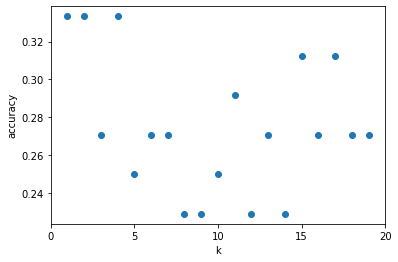

In [28]:
# Determina el k para obtener el accuracy mas ideal 
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [29]:
# Creamos un objeto de clasificador K-NN con 5 vecinos
clf = KNeighborsClassifier(n_neighbors=4)

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)

-- Metricas del Modelo --
Accuracy: 0.3333333333333333
Precision: 0.5120192307692308
Recall: 0.34090909090909094
F1-score: 0.4082706766917293

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        22
           1       0.46      0.27      0.34        22

   micro avg       0.52      0.34      0.41        44
   macro avg       0.51      0.34      0.41        44
weighted avg       0.51      0.34      0.41        44
 samples avg       0.26      0.21      0.22        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Redes Neuronales

In [30]:
model = Sequential() # Se crearaá una serie de capas de neuronas secuenciales.
model.add(Dense(196, input_dim=96, activation='relu'))
model.add(Dense(96, input_dim=32, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [31]:
# parámetros  de la red
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy']) 

In [32]:
# entrenamiento del modelo (datos de entrada y salida)
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
4/4 [==============================] - 1s 4ms/step - loss: 0.4459 - accuracy: 0.8125
Epoch 2/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.8125
Epoch 3/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8125
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8125
Epoch 5/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.8125
Epoch 6/25
4/4 [==============================] - 0s 5ms/step - loss: 0.4133 - accuracy: 0.8125
Epoch 7/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8125
Epoch 8/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.8125
Epoch 9/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8125
Epoch 10/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8125
Epoch 11/25
4/4 [======================

In [33]:
scores = model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8125


In [34]:
model.fit(X_test, y_test, epochs=25)


Epoch 1/25
2/2 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7708
Epoch 2/25
2/2 [==============================] - 0s 6ms/step - loss: 0.4367 - accuracy: 0.7708
Epoch 3/25
2/2 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 4/25
2/2 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 5/25
2/2 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 6/25
2/2 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 7/25
2/2 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 8/25
2/2 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 9/25
2/2 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 10/25
2/2 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7708
Epoch 11/25
2/2 [======================

In [35]:
scores = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.7708


# Normalización de Datos

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 15))
plt.rcParams['figure.figsize'] = [20, 10]

def graficaHistograma(data):
    data.hist()
    plt.show()

<IPython.core.display.Javascript object>


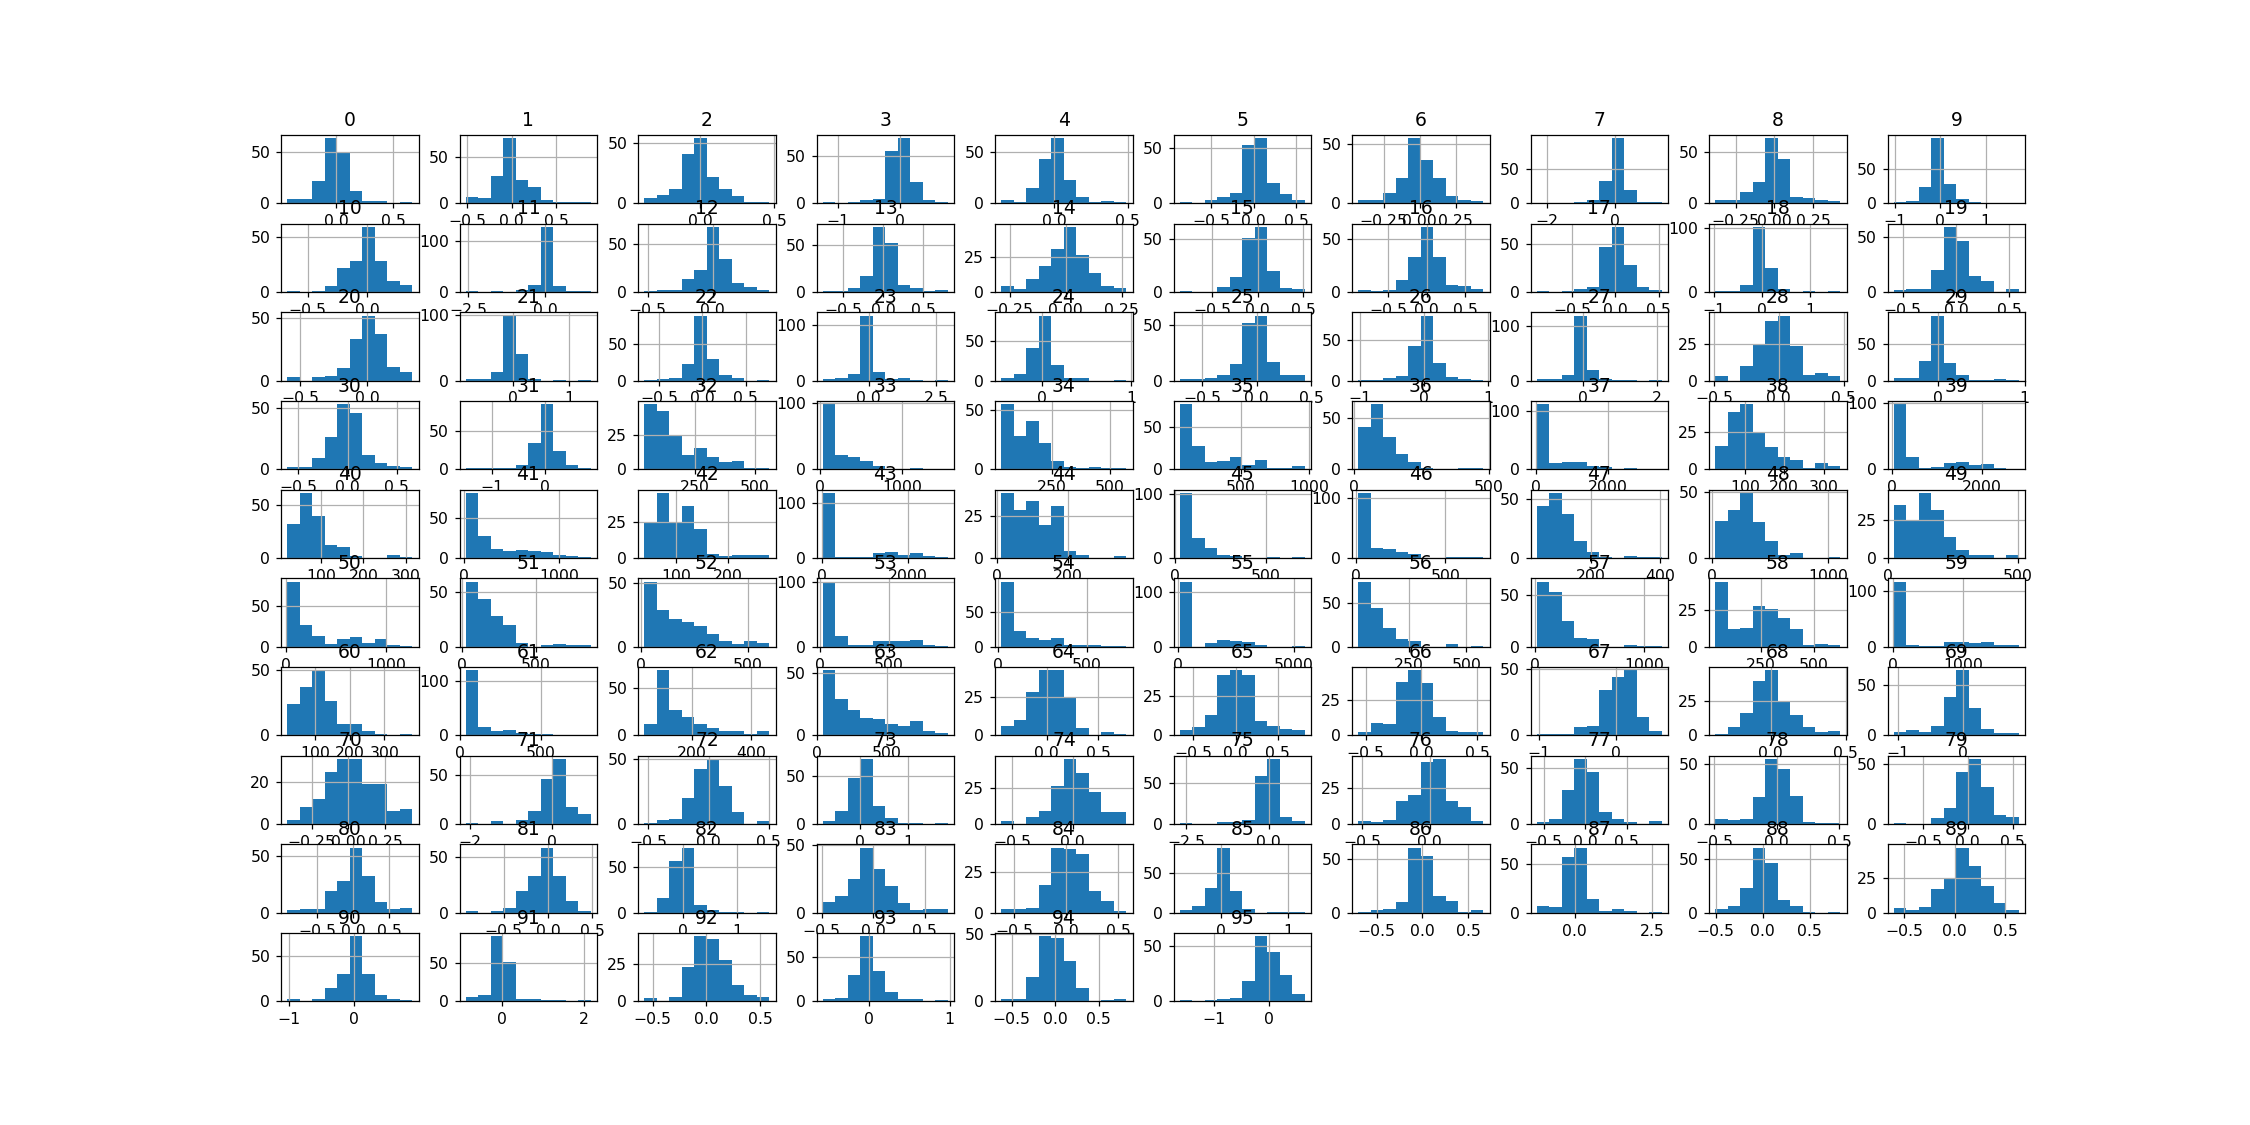

In [37]:
# Muestra la distribucion de las caracteristicas antes de normalizar
graficaHistograma(unified_data.drop(['Valence', 'Arousal'], axis=1))

In [38]:
from sklearn.preprocessing import StandardScaler
# crea un objeto StandardScaler
scaler = StandardScaler()
# escala los datos
scaled_data = scaler.fit_transform(unified_data.drop(['Valence', 'Arousal'], axis=1))
scaled_data

array([[-0.88229118, -1.09812008, -0.73293417, ..., -0.65985413,
        -0.21961058,  1.147715  ],
       [-0.23913888, -0.52527648, -0.02725605, ...,  0.13370247,
         0.11205316,  1.52599281],
       [-0.70823523,  0.09951008, -0.5637163 , ..., -0.92829689,
        -1.12636464, -0.82669807],
       ...,
       [-0.02450238,  0.65321394,  0.97954375, ..., -1.79531703,
        -0.40700719, -0.1528736 ],
       [-1.10038785, -2.26682008, -2.66459107, ...,  1.04706533,
         3.56959835,  1.83815004],
       [-0.74336564,  0.09136379, -0.02591789, ...,  2.34583198,
         0.426595  , -0.18025854]])

<IPython.core.display.Javascript object>


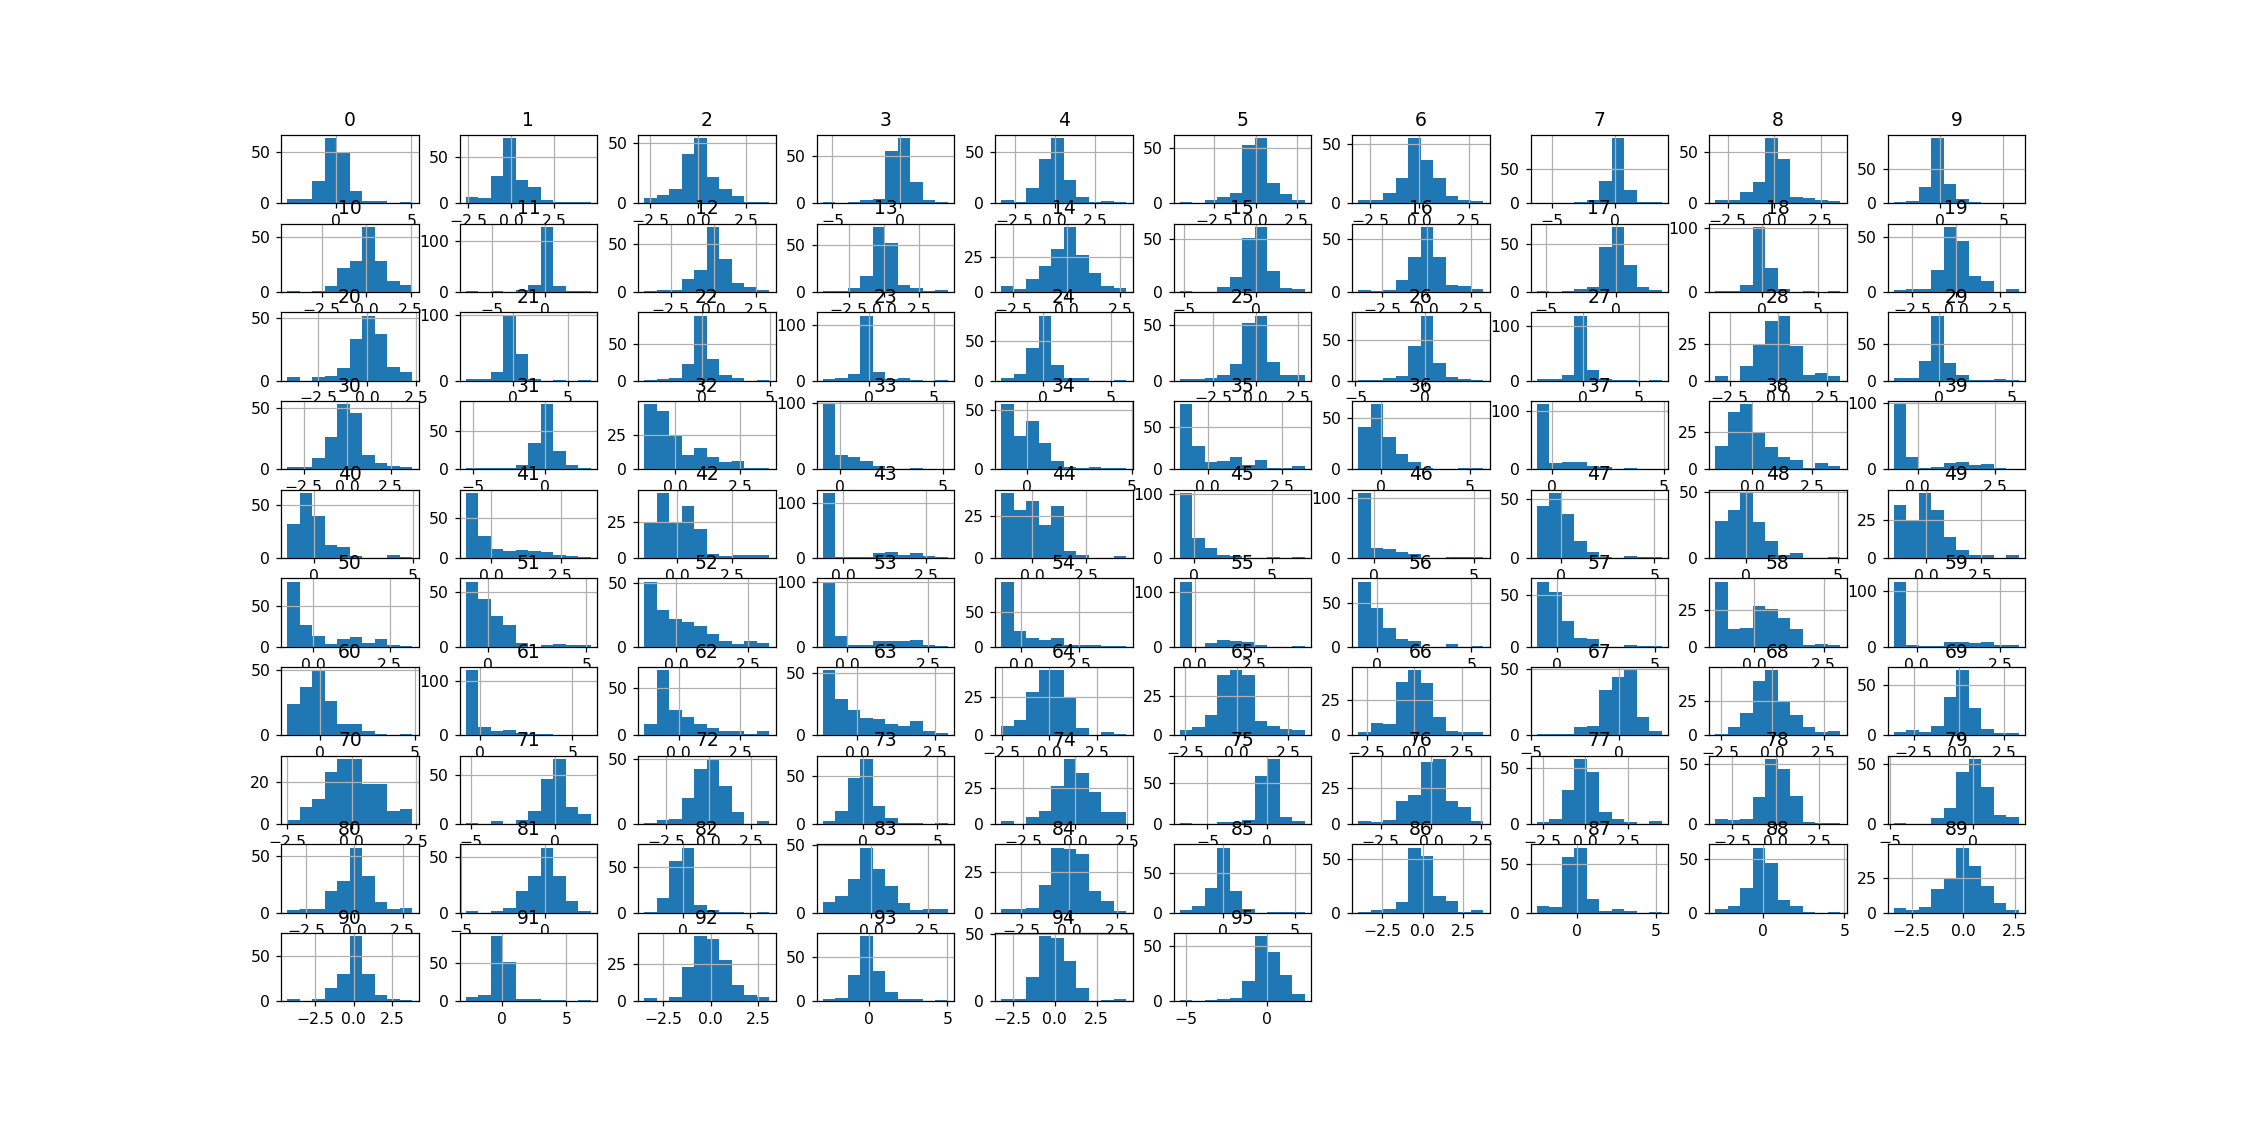

In [39]:
#Se crea un DataFrame con los datos escalados y las etiquetas Valence y Arousal
scaled_data_df = pd.DataFrame(scaled_data, columns=unified_data.drop(['Valence', 'Arousal'], axis=1).columns)

# Muestra la distribucion de las caracteristicas despues de normalizar
graficaHistograma(scaled_data_df)

In [40]:
corr = graficaCorrelacion(scaled_data_df)
corr

C:\Users\PC\AppData\Local\Temp\ipykernel_19344\2289606121.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


In [41]:
scaled_data_df.describe

<bound method NDFrame.describe of            0         1         2         3         4         5         6   \
0   -0.882291 -1.098120 -0.732934  1.144211 -0.460091 -0.210915 -0.953013   
1   -0.239139 -0.525276 -0.027256  0.498793 -0.491291 -0.199322 -0.470592   
2   -0.708235  0.099510 -0.563716  0.923485  1.185893  0.932231  0.853681   
3    1.579005 -0.651960  1.587743 -0.669748 -2.004954 -1.884251 -1.741551   
4    5.062689  3.625359  3.687735 -5.705649 -0.886750 -1.828964  2.407880   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.208556 -0.642408  0.011655  0.459197 -0.239015 -0.650307  0.415908   
156  0.060413 -0.400169 -1.693642 -2.835274  0.982484 -0.875869 -2.609531   
157 -0.024502  0.653214  0.979544  1.577451  0.217998  0.329209  1.085737   
158 -1.100388 -2.266820 -2.664591 -2.715955  1.634548 -1.993344 -2.424972   
159 -0.743366  0.091364 -0.025918 -0.682152 -0.498636 -0.205426 -1.073085   

           7         8         9   ...   

In [42]:
from scipy.stats import boxcox

def boxcox_transform(df, lmbda=None):
    pos_df = df - df.min() + 0.1  # Añade una constante para que los valores sean positivos
    transformed = pos_df.apply(lambda x: boxcox(x, lmbda=lmbda)[0])
    lmbda = boxcox(pos_df.iloc[:,0], lmbda=lmbda)[1]  # Tomar lambda de la primera columna
    transformed = pd.DataFrame(transformed.values, columns=df.columns, index=df.index)
    return transformed, lmbda

           0         1         2          3         4         5         6   \
0    1.335450  0.613529  1.167888  15.856552  1.904133  5.019693  1.247487   
1    1.925592  1.129047  1.869588  13.312535  1.874175  5.040319  1.745692   
2    1.496378  1.667104  1.336265  14.966332  3.470218  7.147653  3.128367   
3    3.541918  1.017118  3.471811   9.173998  0.402671  2.277720  0.441924   
4    6.505322  4.434721  5.549956  -0.568697  1.493353  2.360130  4.771944   
..        ...       ...       ...        ...       ...       ...       ...   
155  1.953367  1.025596  1.908246  13.162343  2.116079  4.253414  2.669174   
156  2.196632  1.238569  0.210186   3.212479  3.278016  3.872140 -0.425223   
157  2.120021  2.127931  2.868923  17.664037  2.552495  6.001953  3.372513   
158  1.132362 -0.557376 -0.763207   3.479103  3.893042  2.116949 -0.243370   
159  1.463975  1.660221  1.870917   9.133392  1.867120  5.029457  1.124054   

            7         8         9   ...        86        87    

<IPython.core.display.Javascript object>


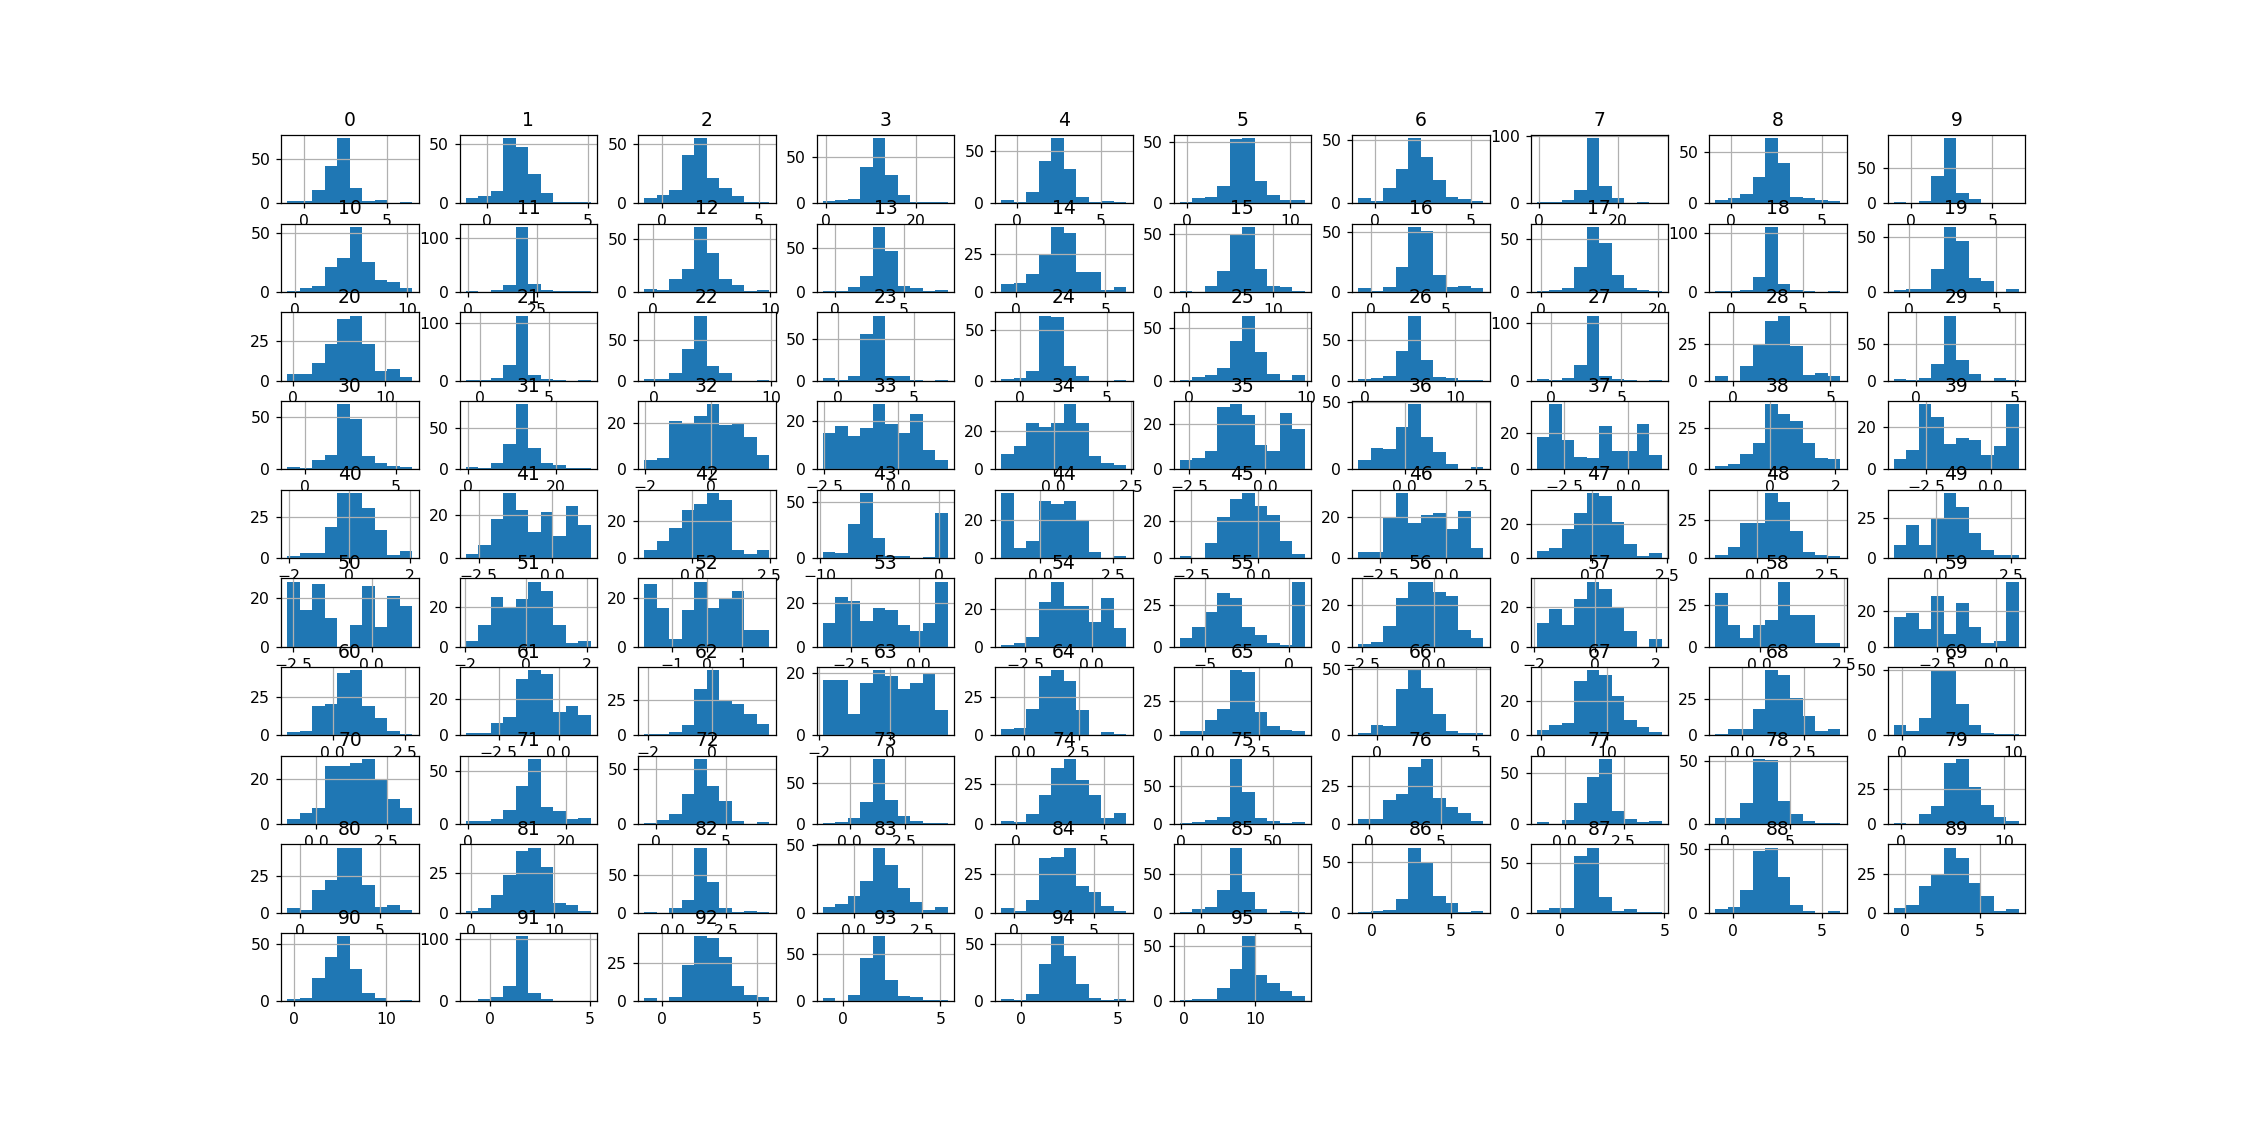

In [43]:
# Aplicar la transformación de Box-Cox a las columnas seleccionadas
# data_norm = boxcox_transform(scaled_data_df, scaled_data_df.columns)
data_norm, lmbda = boxcox_transform(scaled_data_df)

# Mostrar el nuevo DataFrame transformado
print(data_norm)

# Muestra la distribucion de las caracteristicas despues de normalizar
graficaHistograma(data_norm)

In [44]:
scaled_data_df = data_norm
scaled_data_df['Valence'] = unified_data['Valence']
scaled_data_df['Arousal'] = unified_data['Arousal']
scaled_data_df.head()

0         1         2          3         4         5         6  \
0  1.335450  0.613529  1.167888  15.856552  1.904133  5.019693  1.247487   
1  1.925592  1.129047  1.869588  13.312535  1.874175  5.040319  1.745692   
2  1.496378  1.667104  1.336265  14.966332  3.470218  7.147653  3.128367   
3  3.541918  1.017118  3.471811   9.173998  0.402671  2.277720  0.441924   
4  6.505322  4.434721  5.549956  -0.568697  1.493353  2.360130  4.771944   

           7         8         9  ...        88        89        90        91  \
0  19.093642  3.534689  1.085423  ...  1.500571  4.118068  5.644419  0.466230   
1  15.894971  3.129465  1.753625  ...  1.679980  5.217166  6.792495  0.742588   
2  16.647522  1.990656  2.226778  ...  2.258237  2.024661  4.319984  1.742714   
3  12.237272  4.587127  1.720177  ...  1.444313  5.860879  3.896798  1.598276   
4  -0.564274 -0.878651  6.617009  ...  4.296011 -0.723864 -0.689155  5.051890   

         92        93        94         95  Valence  Arousal  
0  2.943539  1.284274  1.878171  12.839814        1        0  
1  3.388947  1.925648  2.159743  14.118768        1        1  
2  1.608433  1.057936  1.084458   6.928376        0        0  
3  4.541613  2.297600  2.844567   9.294120        1        0  
4  0.440307  2.393118  3.329213  -0.597461        0        0  

[5 rows x 98 columns]

In [45]:
corr = graficaCorrelacion(scaled_data_df)
corr

C:\Users\PC\AppData\Local\Temp\ipykernel_19344\2289606121.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


## Normalizado

In [46]:
X, X_train, X_test, y_train, y_test = dividirData(scaled_data_df)

### Arbol de decision

In [47]:
# crear modelo de árbol de decisión
dtr = DecisionTreeRegressor(random_state=4)

# ajustar modelo a los datos de entrenamiento
dtr.fit(X_train, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = dtr.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)


-- Metricas del Modelo --
Accuracy: 0.22916666666666666
Precision: 0.4458064516129032
Recall: 0.5681818181818181
F1-score: 0.4981934965877158

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        22
           1       0.44      0.50      0.47        22

   micro avg       0.45      0.57      0.50        44
   macro avg       0.45      0.57      0.50        44
weighted avg       0.45      0.57      0.50        44
 samples avg       0.35      0.38      0.35        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ramdon Forest

In [48]:
# Crear modelo RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=60)

# Entrenar modelo con datos de entrenamiento
rfc.fit(X_train, y_train)

# Predecir etiquetas de clase en conjunto de prueba
y_pred = rfc.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)

-- Metricas del Modelo --
Accuracy: 0.22916666666666666
Precision: 0.3824175824175824
Recall: 0.4545454545454546
F1-score: 0.3949874686716792

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.46      0.73      0.56        22
           1       0.31      0.18      0.23        22

   micro avg       0.42      0.45      0.43        44
   macro avg       0.38      0.45      0.39        44
weighted avg       0.38      0.45      0.39        44
 samples avg       0.34      0.30      0.31        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

#### Kernel lineal (Linear kernel)

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer
# Obtener características (X) y target (y)
y1 = unified_data["Valence"]
y2 = unified_data["Arousal"]
y1

0      1
1      1
2      0
3      1
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Name: Valence, Length: 160, dtype: int32

In [50]:
# División de datos para "Test" y "Train"
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=50)

In [51]:
# Crear y entrenar el modelo SVM para la primera columna de destino
svclassifier1 = SVC(kernel="linear", C=1.0, decision_function_shape='ovr')
svm1_ovr = OneVsRestClassifier(svclassifier1)
svm1_ovr.fit(X_train, y1_train)

# Crear y entrenar el modelo SVM para la segunda columna de destino
svclassifier2 = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm2_ovr = OneVsRestClassifier(svclassifier2)
svm2_ovr.fit(X_train, y2_train)

# Evaluar el modelo para la primera columna de destino
y1_pred = svm1_ovr.predict(X_test)
accuracy1 = accuracy_score(y1_test, y1_pred)

# Evaluar el modelo para la segunda columna de destino
y2_pred = svm2_ovr.predict(X_test)
accuracy2 = accuracy_score(y2_test, y2_pred)

print("Precisión para la primera columna de destino:", accuracy1)
print("Precisión para la segunda columna de destino:", accuracy2)

# metricasModelo(y_test, y_pred)

Precisión para la primera columna de destino: 0.5416666666666666
Precisión para la segunda columna de destino: 0.625


In [52]:
# Combinar las dos predicciones en un solo arreglo
y_pred = np.stack((y1_pred, y2_pred), axis=-1)

# # Calcular la precisión de la combinación de las dos predicciones
accuracy = accuracy_score(np.stack((y1_test, y2_test), axis=-1), y_pred)

print("Precisión para ambas columnas de destino:", accuracy)

Precisión para ambas columnas de destino: 0.3125


### k-NN

<IPython.core.display.Javascript object>


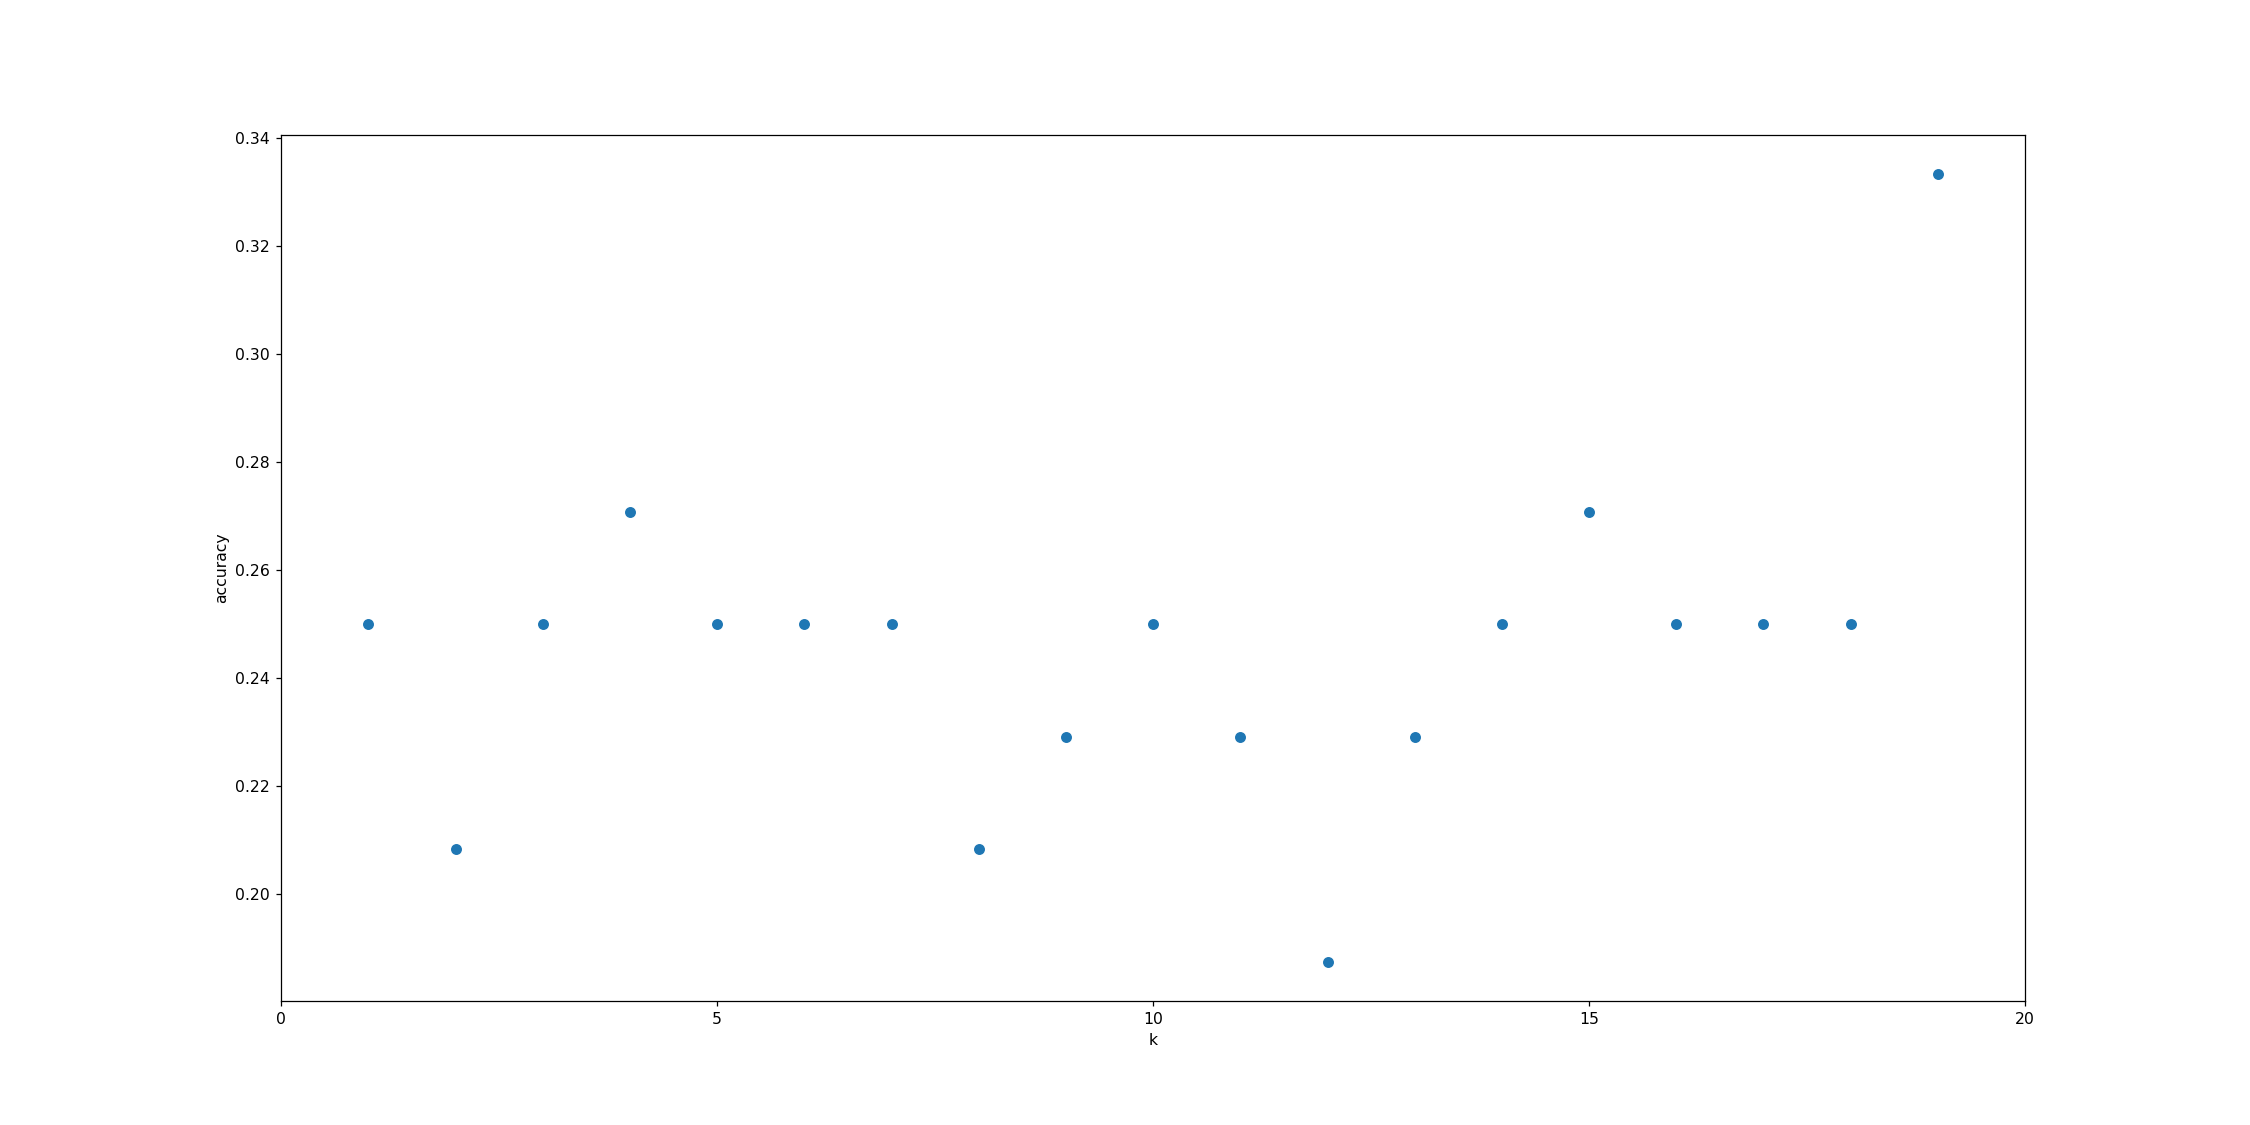

([<matplotlib.axis.XTick at 0x1b8b4520850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [53]:
# Determina el k para obtener el accuracy mas ideal 
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [73]:
# Creamos un objeto de clasificador K-NN con 5 vecinos
clf = KNeighborsClassifier(n_neighbors=19)

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Se imprime las metricas del modelo
metricasModelo(y_test, y_pred)

-- Metricas del Modelo --
Accuracy: 0.3333333333333333
Precision: 0.49837398373983743
Recall: 0.7954545454545454
F1-score: 0.6092796092796093

-- Reporte del Modelo --
              precision    recall  f1-score   support

           0       0.46      0.86      0.60        22
           1       0.53      0.73      0.62        22

   micro avg       0.49      0.80      0.61        44
   macro avg       0.50      0.80      0.61        44
weighted avg       0.50      0.80      0.61        44
 samples avg       0.44      0.52      0.46        44



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Redes Neuronales

In [67]:
model = Sequential() # Se crearaá una serie de capas de neuronas secuenciales.
model.add(Dense(196, input_dim=96, activation='relu'))
model.add(Dense(96, input_dim=32, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [68]:
# parámetros  de la red
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy']) 

In [69]:
# entrenamiento del modelo (datos de entrada y salida)
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
4/4 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8125
Epoch 2/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.7768
Epoch 3/25
4/4 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.7321
Epoch 4/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.7946
Epoch 5/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.8125
Epoch 6/25
4/4 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.8125
Epoch 7/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.8125
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.8125
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.8304
Epoch 10/25
4/4 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.8393
Epoch 11/25
4/4 [======================

In [70]:
scores = model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.8036


In [71]:
model.fit(X_test, y_test, epochs=25)

Epoch 1/25
2/2 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.5833
Epoch 2/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.6875
Epoch 3/25
2/2 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.6875
Epoch 4/25
2/2 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.6042
Epoch 5/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2366 - accuracy: 0.4792
Epoch 6/25
2/2 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.5625
Epoch 7/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.5833
Epoch 8/25
2/2 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.6250
Epoch 9/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2190 - accuracy: 0.6042
Epoch 10/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.6042
Epoch 11/25
2/2 [======================

In [72]:
scores = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.7292
